In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [55]:
data_train = pd.read_csv("train.csv")
data_train.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489


In [56]:
data_train.describe()

,SongLength,NumInstruments,Tempo,LyricalContent,ReleasedYear,Popularity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,273.589503,4.940125,129.077731,0.499154,2001.003625,49.334637
std,71.708680,2.585754,39.988642,0.289179,12.356535,21.296583
min,150.002909,1.000000,60.013660,0.000017,1980.000000,0.000000
25%,212.088516,3.000000,94.237178,0.250352,1990.000000,33.075306
50%,273.014753,5.000000,129.673045,0.495696,2001.000000,49.286768
75%,335.088452,7.000000,162.812788,0.751058,2012.000000,65.515098
max,399.929418,9.000000,199.970512,0.999972,2022.000000,100.000000


In [57]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SongLength      8000 non-null   float64
 1   NumInstruments  8000 non-null   int64  
 2   Genre           8000 non-null   object 
 3   Tempo           8000 non-null   float64
 4   LyricalContent  8000 non-null   float64
 5   ReleasedYear    8000 non-null   int64  
 6   Popularity      8000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 437.6+ KB


In [58]:
data_train.isnull().sum()

SongLength        0
NumInstruments    0
Genre             0
Tempo             0
LyricalContent    0
ReleasedYear      0
Popularity        0
dtype: int64

C:\Users\amalp\AppData\Local\Temp\ipykernel_32008\3501447720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(), annot=True)


<Axes: >

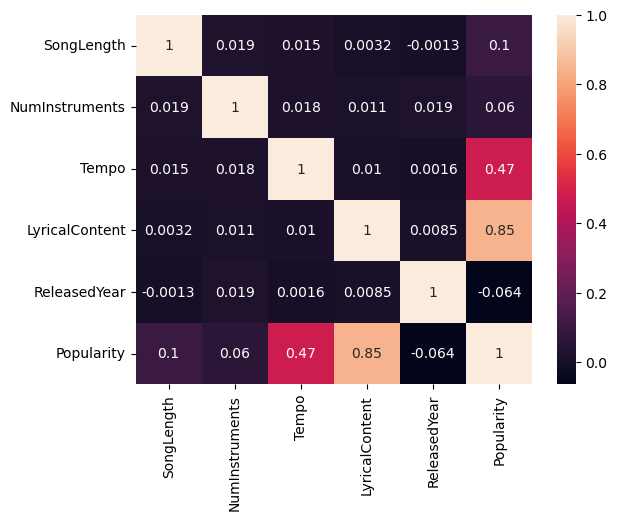

In [59]:
sns.heatmap(data_train.corr(), annot=True)

In [60]:
data_train.dtypes

SongLength        float64
NumInstruments      int64
Genre              object
Tempo             float64
LyricalContent    float64
ReleasedYear        int64
Popularity        float64
dtype: object

In [61]:
data_train.drop(columns=['NumInstruments','SongLength','ReleasedYear','Genre'], inplace=True)

In [62]:
data_train.head()

,Tempo,LyricalContent,Popularity
0,84.774424,0.152603,13.636534
1,65.486515,0.408796,42.910689
2,164.752829,0.318433,48.790880
3,186.565004,0.680595,68.362001
4,140.615871,0.969931,86.969489


In [63]:
data_train_x = data_train[['Tempo','LyricalContent']]
data_train_y = data_train[['Popularity']]

In [67]:
data_test = pd.read_csv("test.csv")
data_test.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear
0,387.678577,4,Classical,113.634583,0.798992,2006
1,189.004660,3,Rap,155.625985,0.345585,1982
2,188.998630,9,Jazz,155.238167,0.671574,1981
3,327.018144,4,Classical,148.989615,0.259165,2008
4,392.477463,6,Pop,151.682743,0.203725,2004


In [68]:
data_test.drop(columns=['NumInstruments','SongLength','ReleasedYear','Genre'], inplace=True)
data_test.head()

,Tempo,LyricalContent
0,113.634583,0.798992
1,155.625985,0.345585
2,155.238167,0.671574
3,148.989615,0.259165
4,151.682743,0.203725


In [71]:
model = LinearRegression()
model.fit(data_train_x,data_train_y)

LinearRegression()

In [72]:
model.score(data_train_x,data_train_y)*100

92.94823863996507

In [73]:
y_pred = model.predict(data_test)

In [77]:
data_test['Predicted Value'] = y_pred
data_test.head()

,Tempo,LyricalContent,Predicted Value
0,113.634583,0.798992,64.080936
1,155.625985,0.345585,46.384455
2,155.238167,0.671574,66.467091
3,148.989615,0.259165,39.396458
4,151.682743,0.203725,36.629746
